## Análisis preliminar Despoblación

En este notebook analizamos algunos datos relevantes así como el comportamiento de algunas de las variables que forman el DataFrame Despoblacion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
Despoblacion = pd.read_csv('/home/dsc/Python/Despoblacion/4.Union_Depuracion_Data/Despoblacion_11.csv', 
                           dtype = {'Codigo CCAA' : str, 'Codigo Provincia' : str, 'Codigo Municipio' : str})

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas
0,Castilla-La Mancha,08,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0
2,Castilla-La Mancha,08,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0
3,Castilla-La Mancha,08,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0


Incluimos la variable objetivo, llamada Umbral, en el DataFrame Despoblacion:
- 1 si es un municipio despoblado (Densidad 2021 <12,5)
- 0 si es un municipio poblado (Densidad 2021 >=12,5) 

Para ello necesitamos la densidad de cada municipio en 2021:

In [4]:
Densidad21 = pd.read_csv('/home/dsc/Python/Despoblacion/2.Data/03_Output_Densidad_Poblacion_21.csv' ,
                         dtype = {'Codigo Municipio' : str})

Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion
0,01001,19.95,146.62
1,01002,96.30,107.03
2,01003,73.02,19.94
3,01004,27.29,66.29
4,01006,12.97,17.81


In [5]:
Densidad21['Umbral'] = Densidad21['Densidad Poblacion'].map(lambda x: 1 if x < 12.5 else 0)

Densidad21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Umbral
0,01001,19.95,146.62,0
1,01002,96.30,107.03,0
2,01003,73.02,19.94,0
3,01004,27.29,66.29,0
4,01006,12.97,17.81,0


Merge con la tabla Despoblación para incluir la columna Umbral de 2021:

In [6]:
Despoblacion = Despoblacion.merge(Densidad21, how = 'left', on = 'Codigo Municipio')

Despoblacion.drop(['Superficie Km2_y', 'Densidad Poblacion_y'], axis = 1, inplace = True)
Despoblacion.rename({'Superficie Km2_x' : 'Superficie Km2', 'Densidad Poblacion_x' : 'Densidad Poblacion'},
                   axis = 1, inplace = True)

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Castilla-La Mancha,08,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0,0
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0,1
2,Castilla-La Mancha,08,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0,0
3,Castilla-La Mancha,08,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0,0
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0,1


Guardamos el DataFrame definitivo que se utilizará en el ML

In [7]:
Despoblacion.to_csv('Despoblacion.csv', header = True, index = False)

### Datos relevantes

#### **1. CCAA y provincias con más municipios ya despoblados en 2011:**

In [8]:
MunicipiosDespoblados = Despoblacion[Despoblacion['Densidad Poblacion'] < 12.5]
MunicipiosDespoblados.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0,1
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0,1
5,Castilla-La Mancha,08,Albacete,02,Alcadozo,02006,734.0,382.0,352.0,99.59,7.37,925.0,3.0,0.0,11.0,105.0,279.0,148.0,131.0,1356.0,507.0,849.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,13.0,12.0,25.0,15.0,12.0,27.0,333.0,364.0,364.0,110.0,405.0,220.0,295.0,350.0,2.0,2.0,80.0,360.0,230.0,210.0,20.0,45.0,40.0,80.0,65.0,50.0,2.0,35.0,680.0,35.0,165.0,120.0,180.0,150.0,75.0,47.0,178.0,487.0,14.0,1.0,60.0,185.0,575.0,400.0,281.0,236.82,6003.56,131.0,27.0,1
6,Castilla-La Mancha,08,Albacete,02,Alcalá del Júcar,02007,1350.0,709.0,641.0,146.82,9.19,547.0,10.0,4.0,21.0,316.0,362.0,209.0,153.0,1392.0,808.0,584.0,0.0,0.0,0.0,0.0,5.0,2.0,7.0,1.0,0.0,44.0,43.0,86.0,84.0,60.0,144.0,1077.0,1241.0,1211.0,110.0,785.0,440.0,460.0,715.0,2.0,25.0,115.0,630.0,575.0,445.0,90.0,75.0,95.0,165.0,100.0,2.0,50.0,185.0,1135.0,185.0,380.0,210.0,425.0,135.0,2.0,45.0,666.0,1216.0,68.0,6.0,180.0,400.0,1318.0,795.0,0.0,0.00,12862.28,327.0,21.0,1
7,Castilla-La Mancha,08,Albacete,02,Alcaraz,02008,1608.0,800.0,808.0,370.53,4.34,953.0,11.0,7.0,23.0,352.0,266.0,154.0,112.0,2139.0,1084.0,1055.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0,1.0,1.0,27.0,43.0,70.0,79.0,97.0,176.0,932.0,1167.0,1125.0,190.0,1000.0,370.0,675.0,730.0,2.0,45.0,110.0,590.0,760.0,415.0,50.0,110.0,85.0,195.0,85.0,80.0,145.0,120.0,1440.0,120.0,415.0,325.0,360.0,260.0,85.0,53.0,370.0,1208.0,56.0,18.0,195.0,395.0,1373.0,864.0,219.0,476.00,26687.94,412.0,79.0,1


In [9]:
MunicipiosDespoblados = MunicipiosDespoblados.groupby(['Nombre CCAA', 'Nombre Provincia'])['Nombre Municipio'].\
                        count().sort_values(ascending = False)
MunicipiosDespoblados= pd.DataFrame(MunicipiosDespoblados).reset_index()
MunicipiosDespoblados = MunicipiosDespoblados.rename({'Nombre Municipio' : 'Nº de municipios'}, axis = 1)
MunicipiosDespoblados

,Nombre CCAA,Nombre Provincia,Nº de municipios
0,Castilla y León,Burgos,293
1,Castilla y León,Salamanca,245
2,Castilla-La Mancha,Guadalajara,242
3,Aragón,Teruel,203
4,Castilla-La Mancha,Cuenca,193
5,Aragón,Zaragoza,185
6,Castilla y León,Ávila,172
7,Castilla y León,Soria,168
8,Castilla y León,Zamora,167
9,Castilla y León,Valladolid,165


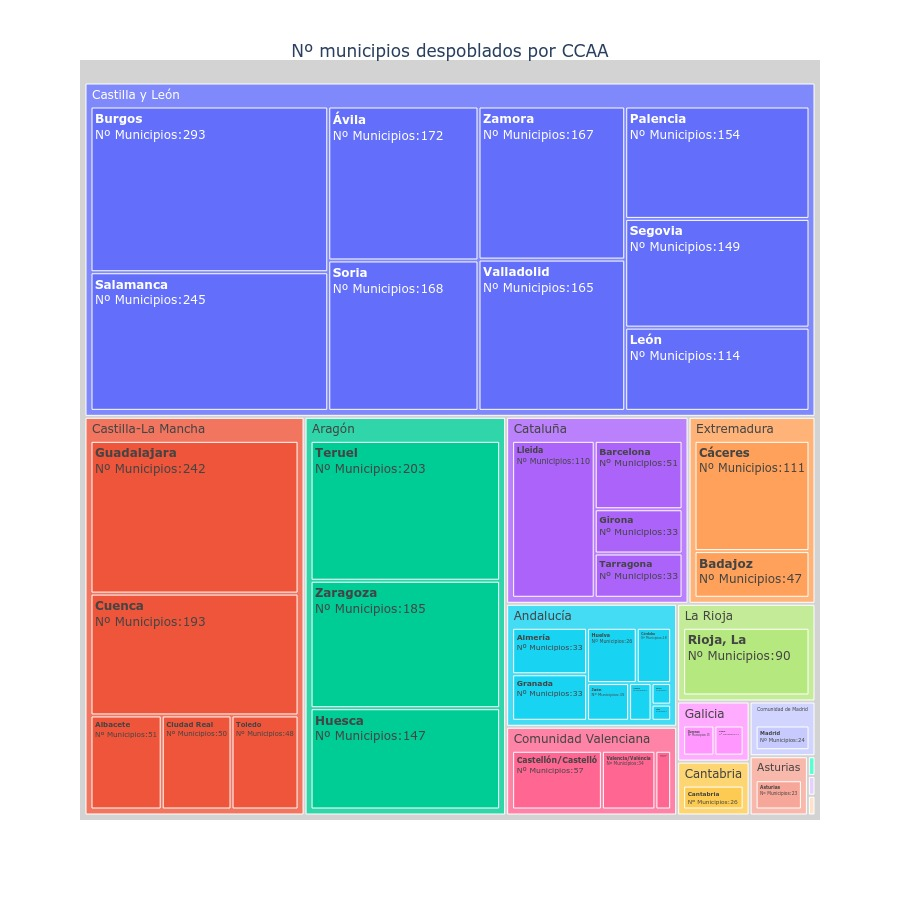

In [10]:
fig = px.treemap(MunicipiosDespoblados, path=['Nombre CCAA','Nombre Provincia'], values= 'Nº de municipios',
                width = 900, height = 900)
fig.update_traces(root_color="lightgrey")
fig.data[0].texttemplate = "<b>%{label}</b><br>Nº Municipios:%{value}"
fig.update_layout(
  title = 'Nº municipios despoblados por CCAA', 
  title_x = 0.5,
  title_y = 0.95)

fig.show('jpg')

#### **2. Superficie Km2, Población total, % de hombres, % de mujeres y densidad media en los años 2011 y 2021**

Para ello vamos a necesitar además de los datos de densidad de 2021, los datos de población de dicho año:

In [11]:
Poblacion21 = pd.read_csv('/home/dsc/Python/Despoblacion/2.Data/02_Output_Poblacion_21.csv' ,
                         dtype = {'Codigo Municipio' : str})

Despoblacion21 = Densidad21.merge(Poblacion21, how = 'left', on = 'Codigo Municipio')
Despoblacion21 = Despoblacion21.drop('Umbral', axis = 1)

Despoblacion21.head()

,Codigo Municipio,Superficie Km2,Densidad Poblacion,Poblacion Total,Poblacion Hombre,Poblacion Mujer
0,01001,19.95,146.62,2925.0,1517.0,1408.0
1,01002,96.30,107.03,10307.0,5084.0,5223.0
2,01003,73.02,19.94,1456.0,756.0,700.0
3,01004,27.29,66.29,1809.0,888.0,921.0
4,01006,12.97,17.81,231.0,117.0,114.0


In [12]:
print('Indicadores 2011')
print('')

SuperficieTotal = Despoblacion['Superficie Km2'].sum()
print(f'La superficie total del territorio nacinal es: {SuperficieTotal.round(2)} km2')

PoblacionTotal11 = Despoblacion['Poblacion Total'].sum()
print(f'La población total en España en 2011 era de: {PoblacionTotal11} habitantes')

DespoblacionHombres11 = (Despoblacion['Poblacion Hombre'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'El porcentaje de hombres en España en 2011 era de: {DespoblacionHombres11.round(2)}%')

DespoblacionMujeres11 = (Despoblacion['Poblacion Mujer'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'El porcentaje de mujeres en España en 2011 era de: {DespoblacionMujeres11.round(2)}%')

DespoblacionDensidad11 = round(Despoblacion['Densidad Poblacion'].mean(), 2)
print(f'La media de la densidad de población en 2011 era de: {DespoblacionDensidad11} hab/km2')

Indicadores 2011

La superficie total del territorio nacinal es: 486128.2 km2
La población total en España en 2011 era de: 44293662.0 habitantes
El porcentaje de hombres en España en 2011 era de: 49.35%
El porcentaje de mujeres en España en 2011 era de: 50.65%
La media de la densidad de población en 2011 era de: 160.41 hab/km2


In [13]:
print('Indicadores 2021')
print('')

PoblacionTotal21 = Despoblacion21['Poblacion Total'].sum()
print(f'La población total en España en 2021 era de: {PoblacionTotal21} habitantes')

DespoblacionHombres21 = (Despoblacion21['Poblacion Hombre'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'El porcentaje de hombres en España en 2021 era de: {DespoblacionHombres21.round(2)}%')

DespoblacionMujeres21 = (Despoblacion21['Poblacion Mujer'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'El porcentaje de mujeres en España en 2021 era de: {DespoblacionMujeres21.round(2)}%')

DespoblacionDensidad21 = round(Despoblacion21['Densidad Poblacion'].mean(), 2)
print(f'La media de la densidad de población en 2021 era de: {DespoblacionDensidad21} hab/km2')

Indicadores 2021

La población total en España en 2021 era de: 47385107.0 habitantes
El porcentaje de hombres en España en 2021 era de: 49.01%
El porcentaje de mujeres en España en 2021 era de: 50.99%
La media de la densidad de población en 2021 era de: 178.6 hab/km2


#### **3. Grado de concentración rural 2011 y 2021**

In [14]:
print('Grado de concentración rural 2011')
print('')

Despoblado11 = Despoblacion[Despoblacion['Densidad Poblacion']<12.5]

DespobladoSuperficie11 = (Despoblado11['Superficie Km2'].sum()/Despoblacion['Superficie Km2'].sum())*100
print(f'Porcentaje de superficie despoblada en 2011 era de: {DespobladoSuperficie11.round(2)}%')

PorcentajeDespoblado11 = (Despoblado11['Poblacion Total'].sum()/Despoblacion['Poblacion Total'].sum())*100
print(f'Porcentaje de población que vivía en territorio despoblado en 2011: {PorcentajeDespoblado11.round(2)}%')

print('')

print('Grado de concentración rural 2021')
print('')

Despoblado21 = Despoblacion21[Despoblacion21['Densidad Poblacion']<12.5]

DespobladoSuperficie21 = (Despoblado21['Superficie Km2'].sum()/Despoblacion21['Superficie Km2'].sum())*100
print(f'Porcentaje de superficie despoblada en 2021 era de: {DespobladoSuperficie21.round(2)}%')

PorcentajeDespoblado21 = (Despoblado21['Poblacion Total'].sum()/Despoblacion21['Poblacion Total'].sum())*100
print(f'Porcentaje de población que vivía en territorio despoblado en 2021: {PorcentajeDespoblado21.round(2)}%')


Grado de concentración rural 2011

Porcentaje de superficie despoblada en 2011 era de: 46.12%
Porcentaje de población que vivía en territorio despoblado en 2011: 2.85%

Grado de concentración rural 2021

Porcentaje de superficie despoblada en 2021 era de: 48.65%
Porcentaje de población que vivía en territorio despoblado en 2021: 2.73%


#### **4. Municipios despoblados 2021 y su situación en 2011.**

In [15]:
UmbralDespoblado11 = Despoblacion[Despoblacion['Umbral'] == 1]

print(f'Hay {UmbralDespoblado11.shape[0]} municipios despolbados en 2021')

Hay 3802 municipios despolbados en 2021


In [16]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio', 
            'Nombre Municipio', 'Poblacion Total', 'Densidad Poblacion', 'Umbral']

UmbralDespoblado11 = UmbralDespoblado11[Columnas].sort_values('Densidad Poblacion', ascending = False)
UmbralDespoblado11 = UmbralDespoblado11[UmbralDespoblado11['Densidad Poblacion'] >= 12.5]

UmbralDespoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total,Densidad Poblacion,Umbral
2627,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,1
2872,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,1
3078,Andalucía,Huelva,21017,Calañas,4187.0,17.61,1
7189,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,1
4352,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,1


In [17]:
print(f'Hay {UmbralDespoblado11.shape[0]} municipios que no estaban despoblados en 2011')

Hay 255 municipios que no estaban despoblados en 2011


In [18]:
UmbralDespoblado11 = UmbralDespoblado11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
UmbralDespoblado11

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Andalucía,Granada,18020,Arenas del Rey,1981.0,21.34,1,92.81,6.72,624.0,332.0,292.0
1,Castilla-La Mancha,Guadalajara,19119,Fuencemillán,139.0,19.17,1,7.25,11.86,86.0,52.0,34.0
2,Andalucía,Huelva,21017,Calañas,4187.0,17.61,1,237.83,11.62,2763.0,1408.0,1355.0
3,Castilla y León,Zamora,49192,San Miguel del Valle,188.0,17.54,1,10.72,11.94,128.0,67.0,61.0
4,Andalucía,Málaga,29057,Genalguacil,544.0,17.07,1,31.87,12.27,391.0,196.0,195.0
...,...,...,...,...,...,...,...,...,...,...,...,...
250,Castilla y León,León,24006,Ardón,609.0,12.52,1,48.65,11.55,562.0,298.0,264.0
251,Andalucía,Jaén,23048,Iznatoraf,1083.0,12.51,1,86.54,10.48,907.0,455.0,452.0
252,Castilla-La Mancha,Cuenca,16148,Palomares del Campo,763.0,12.51,1,60.98,9.36,571.0,292.0,279.0
253,Castilla y León,Zamora,49132,Moreruela de los Infanzones,391.0,12.51,1,31.26,10.68,334.0,175.0,159.0


In [19]:
UmbralDespoblado11['Descenso Densidad'] = UmbralDespoblado11['Densidad Poblacion21']\
                                         - UmbralDespoblado11['Densidad Poblacion11']
UmbralDespoblado11.iloc[UmbralDespoblado11['Descenso Densidad'].idxmax()]

UmbralDespoblado11['Descenso Poblacion'] = UmbralDespoblado11['Poblacion Total21']\
                                         - UmbralDespoblado11['Poblacion Total11']
UmbralDespoblado11.iloc[UmbralDespoblado11['Descenso Poblacion'].idxmin()] 

print('- Malpartida de Plasencia municipio de Granada con mayor descenso de densidad:-79')
print('- Calañas municipio de Andalucía con un mayor descenso de poblacion: -1424')

- Malpartida de Plasencia municipio de Granada con mayor descenso de densidad:-79
- Calañas municipio de Andalucía con un mayor descenso de poblacion: -1424


#### **5. Municipios poblados en 2021 y su situación en 2011**

In [20]:
UmbralPoblado11 = Despoblacion[Despoblacion['Umbral'] == 0]

print(f'Hay {UmbralPoblado11.shape[0]} municipios poblados en 2021')

Hay 3750 municipios poblados en 2021


In [21]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio', 
            'Nombre Municipio', 'Poblacion Total', 'Densidad Poblacion', 'Umbral']

UmbralPoblado11 = UmbralPoblado11[Columnas].sort_values('Densidad Poblacion', ascending = False)
UmbralPoblado11 = UmbralPoblado11[UmbralPoblado11['Densidad Poblacion'] < 12.5]

UmbralPoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total,Densidad Poblacion,Umbral
2538,Cataluña,Girona,17159,Sant Feliu de Buixalleu,768.0,12.37,0
2713,Andalucía,Granada,18124,Lújar,453.0,12.28,0
6844,Castilla y León,Valladolid,47057,Cubillas de Santa Marta,288.0,12.23,0
2500,Cataluña,Girona,17119,Palau de Santa Eulàlia,104.0,12.04,0
7339,Aragón,Zaragoza,50092,Chiprana,465.0,11.93,0


In [22]:
print(f'Hay {UmbralPoblado11.shape[0]} municipios que estaban despoblados en 2011')

Hay 20 municipios que estaban despoblados en 2011


In [23]:
UmbralPoblado11 = UmbralPoblado11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
UmbralPoblado11.head()

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Poblacion Total11,Densidad Poblacion11,Umbral,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Cataluña,Girona,17159,Sant Feliu de Buixalleu,768.0,12.37,0,62.09,13.01,808.0,415.0,393.0
1,Andalucía,Granada,18124,Lújar,453.0,12.28,0,36.88,12.91,476.0,256.0,220.0
2,Castilla y León,Valladolid,47057,Cubillas de Santa Marta,288.0,12.23,0,23.55,14.95,352.0,202.0,150.0
3,Cataluña,Girona,17119,Palau de Santa Eulàlia,104.0,12.04,0,8.64,12.85,111.0,62.0,49.0
4,Aragón,Zaragoza,50092,Chiprana,465.0,11.93,0,38.98,12.90,503.0,266.0,237.0


In [24]:
UmbralPoblado11['Incremento Densidad'] = UmbralPoblado11['Densidad Poblacion21']\
                                       - UmbralPoblado11['Densidad Poblacion11']
UmbralPoblado11.iloc[UmbralPoblado11['Incremento Densidad'].idxmax()]

UmbralPoblado11['Incremento Poblacion'] = UmbralPoblado11['Poblacion Total21']\
                                        - UmbralPoblado11['Poblacion Total11']
UmbralPoblado11.iloc[UmbralPoblado11['Incremento Poblacion'].idxmax()]

print('- Buenavista municipio de Salamanca con mayor ascenso de densidad: 4.4')
print('- Golmayo municipio de Soria con un mayor descenso de poblacion: 711')

- Buenavista municipio de Salamanca con mayor ascenso de densidad: 4.4
- Golmayo municipio de Soria con un mayor descenso de poblacion: 711


#### **6. Municipios con mayor población**

In [25]:
Columnas = ['Nombre CCAA', 'Nombre Provincia', 'Codigo Municipio' ,'Nombre Municipio', 
            'Densidad Poblacion', 'Umbral', 'Poblacion Total']

MayorPoblacion11 = Despoblacion[Columnas].sort_values('Poblacion Total', ascending = False).head(6)

In [26]:
print(f'Hay {MayorPoblacion11.shape[0]} municipios que tienen más de medio millon de habitantes en 2011')

MayorPoblacion11.head(6)

Hay 6 municipios que tienen más de medio millon de habitantes en 2011


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion,Umbral,Poblacion Total
4195,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,0,3265038.0
824,Cataluña,Barcelona,08019,Barcelona,16032.63,0,1615448.0
6770,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,0,798033.0
5713,Andalucía,Sevilla,41091,Sevilla,4950.85,0,703021.0
7548,Aragón,Zaragoza,50297,Zaragoza,692.74,0,674725.0
4362,Andalucía,Málaga,29067,Málaga,1435.47,0,568030.0


In [27]:
MayorPoblacion11 = MayorPoblacion11.merge(Despoblacion21, how = 'left', 
                                         on = 'Codigo Municipio', 
                                         suffixes=('11', '21'))
MayorPoblacion11

,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion11,Umbral,Poblacion Total11,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer
0,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,0,3265038.0,605.77,5456.54,3305408.0,1540894.0,1764514.0
1,Cataluña,Barcelona,08019,Barcelona,16032.63,0,1615448.0,100.76,16243.87,1636732.0,778744.0,857988.0
2,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,0,798033.0,139.27,5670.60,789744.0,374937.0,414807.0
3,Andalucía,Sevilla,41091,Sevilla,4950.85,0,703021.0,142.00,4818.55,684234.0,324312.0,359922.0
4,Aragón,Zaragoza,50297,Zaragoza,692.74,0,674725.0,974.00,693.33,675301.0,323111.0,352190.0
5,Andalucía,Málaga,29067,Málaga,1435.47,0,568030.0,395.71,1459.16,577405.0,277234.0,300171.0


In [28]:
MayorPoblacion11['Incremento Densidad'] = MayorPoblacion11['Densidad Poblacion21']\
                                        - MayorPoblacion11['Densidad Poblacion11']

MayorPoblacion11['Incremento Poblacion'] = MayorPoblacion11['Poblacion Total21']\
                                         - MayorPoblacion11['Poblacion Total11']

print('- Madrid con mayor incremento de población: 40370.\n- Barcelona con mayor incremento de densidad: 211.24')
print('- Descenso de población en Valencia y Sevilla')
MayorPoblacion11.sort_values('Incremento Poblacion', ascending = False)

- Madrid con mayor incremento de población: 40370.
- Barcelona con mayor incremento de densidad: 211.24
- Descenso de población en Valencia y Sevilla


,Nombre CCAA,Nombre Provincia,Codigo Municipio,Nombre Municipio,Densidad Poblacion11,Umbral,Poblacion Total11,Superficie Km2,Densidad Poblacion21,Poblacion Total21,Poblacion Hombre,Poblacion Mujer,Incremento Densidad,Incremento Poblacion
0,Comunidad de Madrid,Madrid,28079,Madrid,5389.90,0,3265038.0,605.77,5456.54,3305408.0,1540894.0,1764514.0,66.64,40370.0
1,Cataluña,Barcelona,08019,Barcelona,16032.63,0,1615448.0,100.76,16243.87,1636732.0,778744.0,857988.0,211.24,21284.0
5,Andalucía,Málaga,29067,Málaga,1435.47,0,568030.0,395.71,1459.16,577405.0,277234.0,300171.0,23.69,9375.0
4,Aragón,Zaragoza,50297,Zaragoza,692.74,0,674725.0,974.00,693.33,675301.0,323111.0,352190.0,0.59,576.0
2,Comunidad Valenciana,Valencia/València,46250,Valencia,5730.11,0,798033.0,139.27,5670.60,789744.0,374937.0,414807.0,-59.51,-8289.0
3,Andalucía,Sevilla,41091,Sevilla,4950.85,0,703021.0,142.00,4818.55,684234.0,324312.0,359922.0,-132.30,-18787.0


### Análisis variable objetivo: Umbral

In [29]:
Despoblacion['Umbral'].value_counts()

1    3802
0    3750
Name: Umbral, dtype: int64

Variable objetivo muy igualadas.

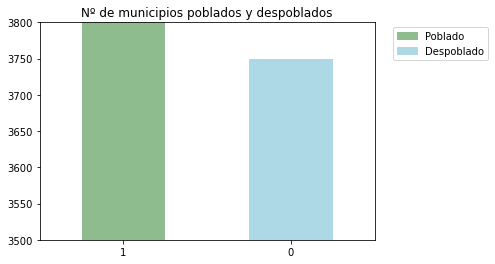

In [30]:
Despoblacion['Umbral'].value_counts().plot(kind="bar",color=['darkseagreen', 'lightblue'])

plt.title('Nº de municipios poblados y despoblados')

plt.xticks(rotation=0)
colors = {'Poblado':'darkseagreen', 'Despoblado':'lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.04, 1))
plt.ylim(3500, 3800)

plt.show()

### Análisis descriptivo

In [31]:
Descriptivo = Despoblacion.describe().apply(lambda s: s.apply('{0:.2f}'.format))
Descriptivo

,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
count,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00,7552.00
mean,5865.16,2894.69,2970.46,64.37,160.41,629.72,58.52,19.99,47.73,2080.25,1782.85,979.63,803.22,6454.15,3192.29,3261.86,11.69,12.70,16.19,121.62,1.76,4.21,42.57,0.52,0.17,405.34,394.52,799.87,403.90,454.99,858.88,1258.91,3297.65,3157.68,933.98,3873.64,978.03,2519.22,2638.32,83.94,185.02,354.20,1262.91,3564.18,1096.29,171.54,236.18,418.18,736.32,285.98,196.07,805.26,516.71,5251.93,516.71,1343.92,1456.76,1668.12,539.65,261.01,44.35,1245.31,3015.60,256.39,12.14,1244.78,995.39,4189.91,3244.19,3600.76,2356.81,3906.47,162.88,56.62,0.50
std,48779.77,23115.50,25672.07,94.55,826.66,343.62,488.23,184.79,406.66,25154.01,17644.21,8883.80,8799.35,45722.50,22596.62,23174.54,44.93,73.60,130.39,1731.90,3.69,28.09,310.99,3.59,1.70,4281.66,4722.51,8996.11,5050.49,6620.65,11666.93,3330.69,24837.54,23454.51,7067.03,31896.04,9030.69,21992.26,20138.26,787.81,1769.46,3282.08,8232.83,32722.94,9547.13,1211.60,1726.66,3601.86,5893.83,2340.09,1544.22,10155.87,5476.74,42476.88,5476.74,12271.19,11575.45,12345.48,4304.91,2190.19,12.76,9081.62,21714.27,2299.36,62.70,12308.29,7398.71,30481.91,25283.90,76799.59,25950.70,6691.05,286.53,169.96,0.50
min,5.00,3.00,2.00,0.03,0.29,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,6.00,7.00,0.00,2.00,2.00,0.00,2.00,2.00,2.00,0.00,2.00,4.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,5.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,175.00,93.75,81.00,19.29,5.37,355.00,0.00,0.00,2.00,34.00,18.00,12.00,5.00,85.00,45.00,38.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,3.00,3.00,7.00,7.00,6.00,13.00,171.75,181.00,181.00,10.00,95.00,55.00,65.00,85.00,2.00,2.00,15.00,55.00,80.00,55.00,2.00,15.00,5.00,20.00,10.00,2.00,2.00,25.00,140.00,25.00,50.00,40.00,35.00,10.00,2.00,34.00,82.00,178.00,5.00,1.00,15.00,55.00,159.00,90.00,0.00,32.63,885.23,30.00,5.00,0.00
50%,569.00,298.00,274.00,36.11,14.02,694.00,3.00,1.00,7.00,128.00,96.00,58.00,34.00,417.50,21

Mayores valores extremos:

In [32]:
Descriptivo = Descriptivo.astype(float).round(2)
Diferencia = Descriptivo.iloc[7] - Descriptivo.iloc[3]
Diferencia.sort_values(ascending = False)

Deuda (Miles de €)                         6347900.0
Poblacion Total                            3265033.0
Hogares Familiares                         2806763.0
Total Paro Registrado                      2636964.0
Con Estudios                               2208071.0
                                             ...    
Nº Residencias Mayores                         222.0
Nº Centros Sanitarios                          187.0
Nº Instituciones Religiosas y Militares        102.0
Edad Media Edificios                            61.0
Umbral                                           1.0
Length: 75, dtype: float64

In [33]:
Descriptivo[['Deuda (Miles de €)', 'Poblacion Total', 'Hogares Familiares', 
             'Total Paro Registrado', 'Con Estudios']] #tablas con valores más extremos

,Deuda (Miles de €),Poblacion Total,Hogares Familiares,Total Paro Registrado,Con Estudios
count,7552.00,7552.00,7552.00,7552.00,7552.00
mean,3600.76,5865.16,5251.93,6454.15,3564.18
std,76799.59,48779.77,42476.88,45722.50,32722.94
min,0.00,5.00,2.00,0.00,4.00
25%,0.00,175.00,140.00,85.00,80.00
50%,56.00,569.00,477.50,417.50,290.00
75%,556.50,2460.25,2170.00,2308.50,1325.00
max,6347900.00,3265038.00,2806765.00,2636964.00,2208075.00


### Análisis multivariante

Para algunas de las siguientes visualizaciones, necesitamos segmentar el DataFrame en dos, Despoblado y Poblado:

In [34]:
Despoblado = Despoblacion[Despoblacion['Umbral'] == 1]
Poblado = Despoblacion[Despoblacion['Umbral'] == 0]

DataFrame con un rango de valores muy amplio.  
Las variables relacionadas con la población, calculamos % respecto al total de población de cada municipio.  
El resto, escala logarítmica en el eje y.

Població hombre y mujer segmentada por municipios despoblados y poblados:

In [35]:
Despoblado = Despoblado.copy()
Poblado = Poblado.copy()

Poblado['PorcentHombre'] = (Poblado['Poblacion Hombre'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Poblacion Hombre'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentMujer'] = (Poblado['Poblacion Mujer'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Poblacion Mujer'] / Despoblado['Poblacion Total'])*100

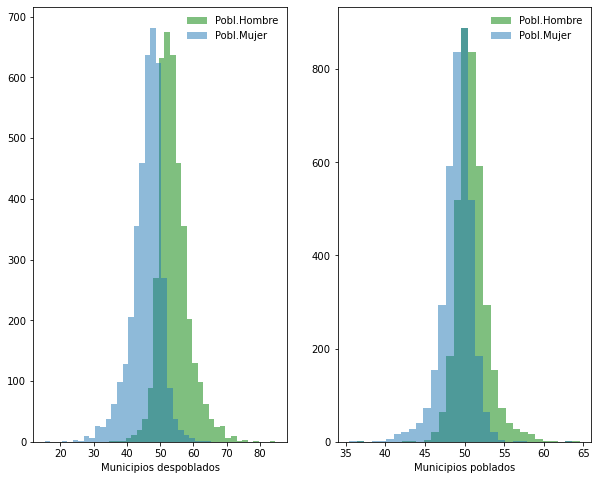

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax1.hist(Despoblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')

ax2.hist(Poblado['PorcentHombre'], bins = 30, color='green', alpha = .5, label = 'Pobl.Hombre')
ax2.hist(Poblado['PorcentMujer'], bins = 30, alpha = .5, label = 'Pobl.Mujer')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nacimientos y defunciones segmentado por municipios despoblados y poblados:

In [37]:
Poblado['PorcentNacimientos'] = (Poblado['Nacimientos'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNacimientos'] = (Despoblado['Nacimientos'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentDefunciones'] = (Poblado['Defunciones'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentDefunciones'] = (Despoblado['Defunciones'] / Despoblado['Poblacion Total'])*100

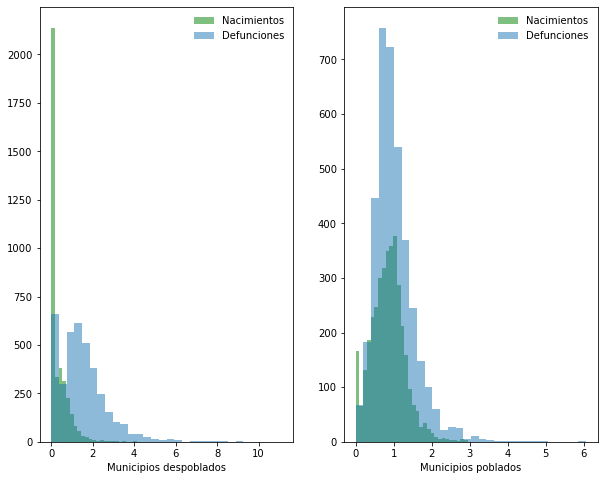

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax1.hist(Despoblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')

ax2.hist(Poblado['PorcentNacimientos'], bins = 30, color='green', alpha = .5, label = 'Nacimientos')
ax2.hist(Poblado['PorcentDefunciones'], bins = 30, alpha = .5, label = 'Defunciones')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población igual o mayor a 65 años segmentada por municipios despoblados y poblados:

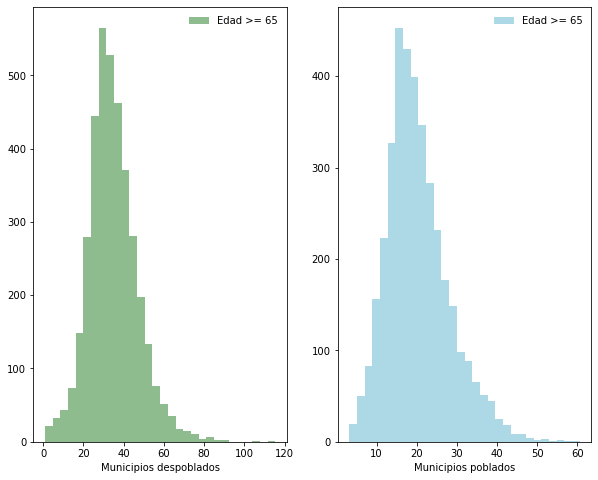

In [39]:
Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Porcent65'], bins = 30, color='darkseagreen', label = 'Edad >= 65')
ax2.hist(Poblado['Porcent65'], bins = 30, color='lightblue', label = 'Edad >= 65')

ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Población con y sin estudios segmentada por municipios despoblados y poblados:

In [40]:
Poblado['PorcentEstudios'] = (Poblado['Con Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentEstudios'] = (Despoblado['Con Estudios'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentNoEstudios'] = (Poblado['Sin Estudios'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentNoEstudios'] = (Despoblado['Sin Estudios'] / Despoblado['Poblacion Total'])*100

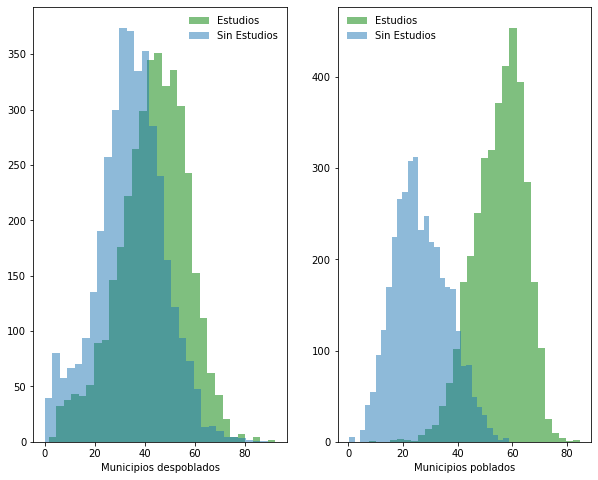

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax1.hist(Despoblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')

ax2.hist(Poblado['PorcentEstudios'], bins = 30, color='green', alpha = .5, label = 'Estudios')
ax2.hist(Poblado['PorcentNoEstudios'], bins = 30, alpha = .5, label = 'Sin Estudios')


ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [42]:
Despoblado[Despoblado['PorcentNoEstudios']>85]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
3013,Castilla-La Mancha,08,Guadalajara,19,Torrecuadradilla,19278,35.0,20.0,15.0,32.88,1.06,1020.0,0.0,0.0,1.0,4.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,54.0,56.0,56.0,2.0,5.0,25.0,10.0,20.0,2.0,2.0,2.0,30.0,4.0,25.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,2.0,25.0,2.0,15.0,15.0,2.0,2.0,2.0,54.0,60.0,54.0,5.0,9.0,2.0,15.0,31.0,18.0,0.0,0.0,481.12,4.0,1.0,1,57.142857,42.857143,0.0,2.857143,71.428571,11.428571,85.714286
4936,Castilla y León,07,Salamanca,37,"Bastida, La",37045,28.0,17.0,11.0,18.53,1.51,1112.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,20.0,14.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,32.0,32.0,32.0,2.0,15.0,15.0,2.0,20.0,2.0,2.0,2.0,25.0,7.0,15.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10.0,2.0,10.0,2.0,2.0,2.0,2.0,48.0,50.0,35.0,2.0,0.0,2.0,15.0,9.0,9.0,0.0,7.0,1258.42,11.0,3.0,1,60.714286,39.285714,0.0,0.000000,53.571429,25.000000,89.285714


Nº de hogares sin internet segmentados por municipios despoblados y poblados:

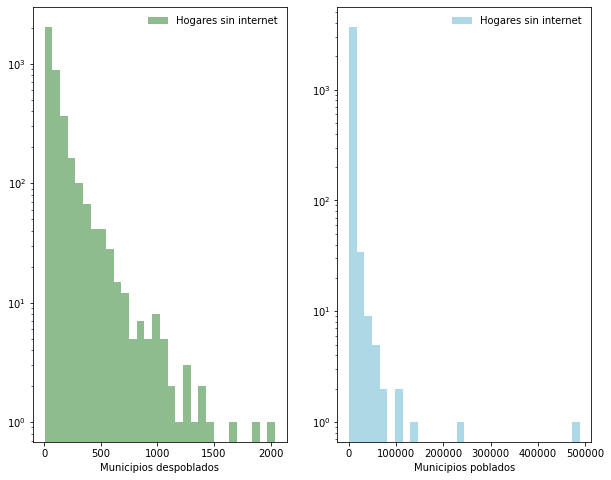

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Nº Hogares no Internet'], bins = 30, color='darkseagreen', label = 'Hogares sin internet')
ax2.hist(Poblado['Nº Hogares no Internet'], bins = 30, color='lightblue', label = 'Hogares sin internet')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

Nº de transacciones inmobiliarias anuales segmentadas por municipios despoblados y poblados:

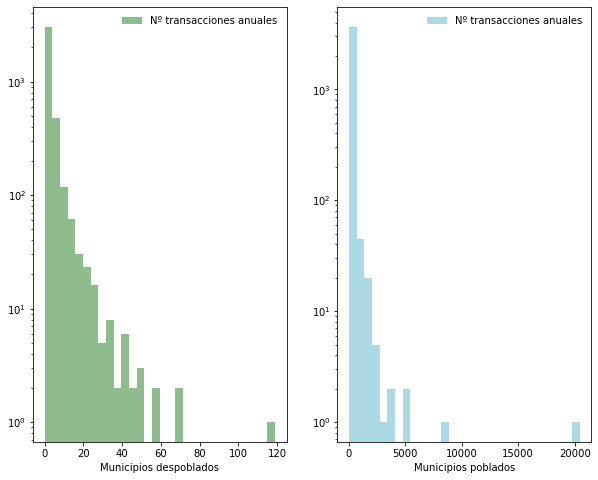

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,8))

ax1.hist(Despoblado['Número de transacciones anuales 2011'], bins = 30, color='darkseagreen', label = 'Nº transacciones anuales')
ax2.hist(Poblado['Número de transacciones anuales 2011'], bins = 30, color='lightblue', label = 'Nº transacciones anuales')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.show()

In [45]:
Despoblado[Despoblado['Número de transacciones anuales 2011'] >= 100]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
1567,Extremadura,11,Cáceres,10,"Gordo, El",10085,385.0,203.0,182.0,77.04,5.0,320.0,1.0,2.0,4.0,214.0,445.0,270.0,175.0,505.0,213.0,292.0,1.0,2.0,3.0,9.0,1.0,0.0,119.0,0.0,0.0,10.0,13.0,23.0,51.0,48.0,99.0,352.0,359.0,359.0,35.0,245.0,105.0,150.0,205.0,2.0,2.0,25.0,165.0,152.0,110.0,2.0,2.0,25.0,45.0,20.0,20.0,25.0,45.0,325.0,45.0,130.0,120.0,65.0,2.0,20.0,42.0,136.0,363.0,6.0,2.0,50.0,125.0,262.0,168.0,0.0,255.94,4714.31,24.0,9.0,1,52.727273,47.272727,0.25974,1.038961,27.272727,39.480519,42.857143


In [46]:
Poblado[Poblado['Número de transacciones anuales 2011'] >= 20000]

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral,PorcentHombre,PorcentMujer,PorcentNacimientos,PorcentDefunciones,Porcent65,PorcentEstudios,PorcentNoEstudios
4195,Comunidad de Madrid,13,Madrid,28,Madrid,28079,3265038.0,1529842.0,1735196.0,605.77,5389.9,657.0,32938.0,12941.0,26544.0,1736667.0,1103251.0,557850.0,545401.0,2636964.0,1312483.0,1324481.0,201.0,4419.0,9450.0,135395.0,187.0,1706.0,20425.0,145.0,102.0,291260.0,338909.0,630169.0,384806.0,511987.0,896793.0,131726.0,1615548.0,1530957.0,458500.0,2112935.0,615165.0,1486500.0,1315145.0,50425.0,114875.0,219655.0,520020.0,2208075.0,637855.0,72960.0,105625.0,234485.0,382030.0,156535.0,104030.0,665045.0,379830.0,2806765.0,379830.0,819840.0,753335.0,794910.0,289370.0,149315.0,36.0,502441.0,1434972.0,140362.0,841.0,832160.0,488370.0,1970814.0,1635666.0,6347900.0,1884054.26,21945.89,127.0,44.0,0,46.855259,53.144741,1.008809,0.812977,18.840975,67.62785,15.92692


Grupos de edades segmentadas por municipios despoblados y poblados:

In [47]:
Poblado['Porcent16'] = (Poblado['Edad < 16'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent16'] = (Despoblado['Edad < 16'] / Despoblado['Poblacion Total'])*100

Poblado['Porcent45'] = (Poblado['16 =< Edad =<64'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent45'] = (Despoblado['16 =< Edad =<64'] / Despoblado['Poblacion Total'])*100

Poblado['Porcent65'] = (Poblado['Edad >= 65'] / Poblado['Poblacion Total'])*100
Despoblado['Porcent65'] = (Despoblado['Edad >= 65'] / Despoblado['Poblacion Total'])*100

EdadDespoblado = Despoblado[['Porcent16', 'Porcent45', 'Porcent65']]
EdadPoblado = Poblado[['Porcent16', 'Porcent45', 'Porcent65']]

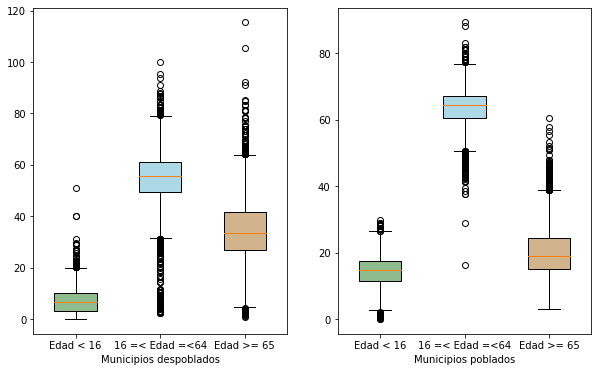

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(EdadDespoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])
box2 = ax2.boxplot(EdadPoblado, patch_artist=True, widths = 0.5, labels = ['Edad < 16', '16 =< Edad =<64', 'Edad >= 65'])

colors = ['darkseagreen', 'lightblue', 'tan']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de personas extranjeras segmentadas por municipios despoblados y poblados:

In [49]:
Poblado['PorcentHombre'] = (Poblado['Nº Hombres Extranjeros'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentHombre'] = (Despoblado['Nº Hombres Extranjeros'] / Despoblado['Poblacion Total'])*100

Poblado['PorcentMujer'] = (Poblado['Nº Mujeres Extranjeras'] / Poblado['Poblacion Total'])*100
Despoblado['PorcentMujer'] = (Despoblado['Nº Mujeres Extranjeras'] / Despoblado['Poblacion Total'])*100

ExtranDespoblado = Despoblado[['PorcentHombre', 'PorcentMujer']]
ExtranPoblado = Poblado[['PorcentHombre', 'PorcentMujer']]

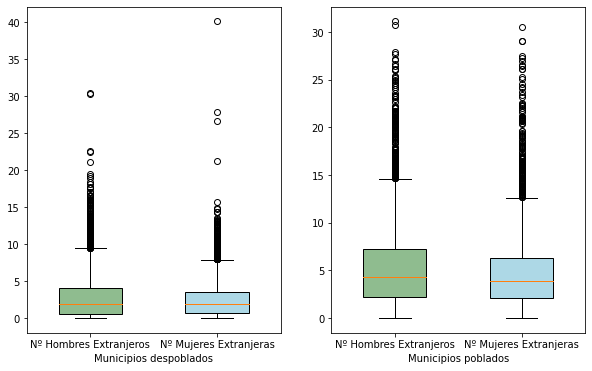

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(ExtranDespoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])
box2 = ax2.boxplot(ExtranPoblado, patch_artist=True, widths = 0.5, labels = ['Nº Hombres Extranjeros', 'Nº Mujeres Extranjeras'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

Número de hogares unipersonales y familiares segmentadas por municipios despoblados y poblados:

In [51]:
HogarDespoblado = Despoblado[['Hogares Unipersonales', 'Hogares Familiares']]
HogarPoblado = Poblado[['Hogares Unipersonales', 'Hogares Familiares']]

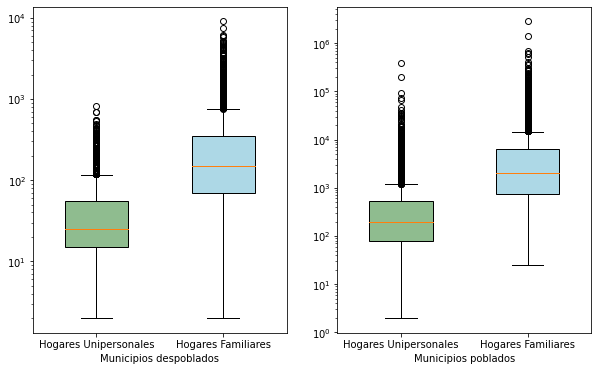

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))

box1 = ax1.boxplot(HogarDespoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])
box2 = ax2.boxplot(HogarPoblado, patch_artist=True, widths = 0.5, 
                   labels = ['Hogares Unipersonales', 'Hogares Familiares'])

colors = ['darkseagreen', 'lightblue']
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlabel('Municipios despoblados')
ax2.set_xlabel('Municipios poblados')

plt.show()

### Matriz de correlación

Al tener muchas variables, imposible realizar un mapa de calor.  
Optamos por poner el foco en las correlacones de las variables predicitivas respecto a la variable objetivo:

In [53]:
Corr = Despoblacion.corr()
Corr[['Umbral']].sort_values(by = 'Umbral',ascending = False).style.background_gradient()

,Umbral
Umbral,1.000000
Edad Media Edificios,0.592607
Altitud Municipios,0.564253
Superficie (Ha) Agricolas,0.001629
Superficie Km2,-0.014246
Deuda (Miles de €),-0.046137
Nº Mujeres Otra CCAA,-0.066646
Nº Establecimientos Servicios,-0.067313
Nº Total Otra CCAA,-0.071139
Nº Hombres Otra CCAA,-0.076970
